## Q1-->1) Delivery_time -> Predict delivery time using sorting time 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
delivry_data=pd.read_csv("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-4/delivery_time.csv")

In [4]:
delivry_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
delivry_data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
delivry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
delivry_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
delivry_data[delivry_data.duplicated()].shape
delivry_data.shape

(0, 2)

(21, 2)

In [9]:
delivry_data.drop_duplicates().head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:>

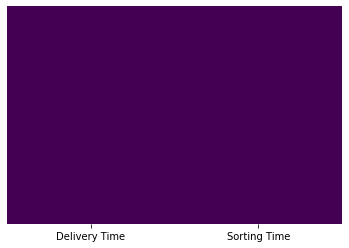

In [10]:
sns.heatmap(delivry_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

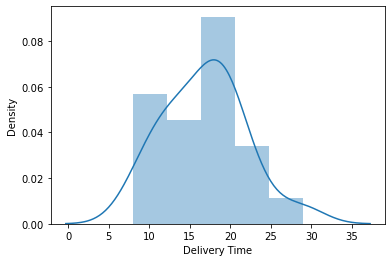

In [11]:
sns.distplot(delivry_data['Delivery Time'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

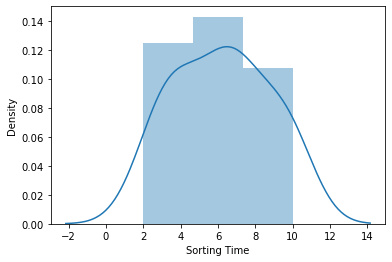

In [12]:
sns.distplot(delivry_data['Sorting Time'])

In [13]:
## renaming Columns

delivery_data1=delivry_data.rename({'Delivery Time':'Delivery_Time',
                     'Sorting Time':'Sorting_Time'},axis=1)

In [14]:
delivery_data1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
## Finding Correlation

In [16]:
delivery_data1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

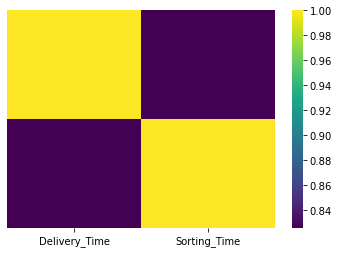

In [17]:
sns.heatmap(delivery_data1.corr(),cmap='viridis',cbar=True,yticklabels=False)

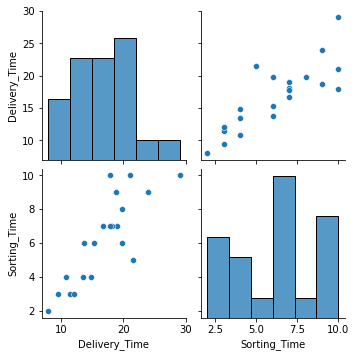

In [18]:
sns.pairplot(delivery_data1)

In [19]:
## Delivery Time and Sorting Time Both are Highly Correlated

In [20]:
## Fitting a Linear Regression Model

In [21]:
import statsmodels.formula.api as smf

## Problem Statement-Delivery_time -> Predict delivery time using sorting time 
##So Delivery Time is our y variable
## And Sorting Time is our x variable


## Model Building

In [22]:
model=smf.ols("Delivery_Time~Sorting_Time",data=delivery_data1).fit()

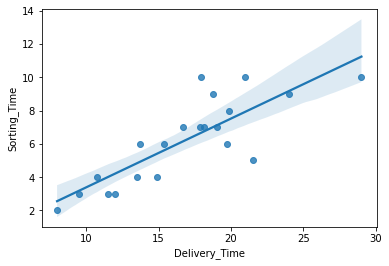

In [23]:
sns.regplot(x='Delivery_Time',y='Sorting_Time',data=delivery_data1);

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        10:02:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [25]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [26]:
## T values, p-values

model.tvalues,model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [27]:
## R squared and Adj R squared

(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Model Predictions

In [28]:
## Manual predictions-->Formula(B0+B1(x)   wherein B0-->intercept, B1-->Proprtion change)

delivery_time=(6.582734)+(1.649020)*(5) ##let x=sorting time=5
delivery_time

14.827834

In [29]:
##Automatic Predictiom

new_dt=pd.Series([5,8])
new_dt

0    5
1    8
dtype: int64

In [30]:
data_pred=pd.DataFrame(new_dt,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,8


In [31]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [32]:
## This signifies that if Sorting Time is between 5 -8 , then 
## delivery time is between 14-20.

## Log Transformation

In [33]:
X=delivery_data1.iloc[:,1]
Y=delivery_data1.iloc[:,0]

X.head()
Y.head()

0    10
1     4
2     6
3     9
4    10
Name: Sorting_Time, dtype: int64

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery_Time, dtype: float64

In [34]:
df_log=delivery_data1.copy()

In [35]:
df_log['log_Delivery_time']=np.log(delivery_data1['Delivery_Time'])

In [36]:
df_log.head()

,Delivery_Time,Sorting_Time,log_Delivery_time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [37]:
df_log['log_Sorting_Time']=np.log(delivery_data1['Sorting_Time'])

In [38]:
df_log.head()

,Delivery_Time,Sorting_Time,log_Delivery_time,log_Sorting_Time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


In [39]:
model_log=smf.ols('log_Delivery_time~log_Sorting_Time',data=df_log).fit()

In [40]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.60e-07
Time:                        10:02:47   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
log_Sorting_Time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
## Improved R^2 Values

d1={'Models':['Model','Log_tranformed_Model'],'Values':[model.rsquared,model_log.rsquared]}
model_accuracy_tb=pd.DataFrame(d1)

model_accuracy_tb

,Models,Values
0,Model,0.682271
1,Log_tranformed_Model,0.772161


In [42]:
## Thus we can conclude, Model Accuracy is Increased by Using Log Transformation.